In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
# 读取数据
data = pd.read_csv("data/某电商平台美妆数据.csv")

# 数据清洗
# 统一时间格式
data['update_time'] = pd.to_datetime(data['update_time'])

# 填充缺失值，例如用 0 替换 NaN
data['sale_count'] = data['sale_count'].fillna(0).astype(int)
data['comment_count'] = data['comment_count'].fillna(0).astype(int)


# 转换数据类型
data['price'] = data['price'].astype(float)
data['sale_count'] = data['sale_count'].astype(int)
data['comment_count'] = data['comment_count'].astype(int)

In [14]:
# 处理重复值
data = data.drop_duplicates()

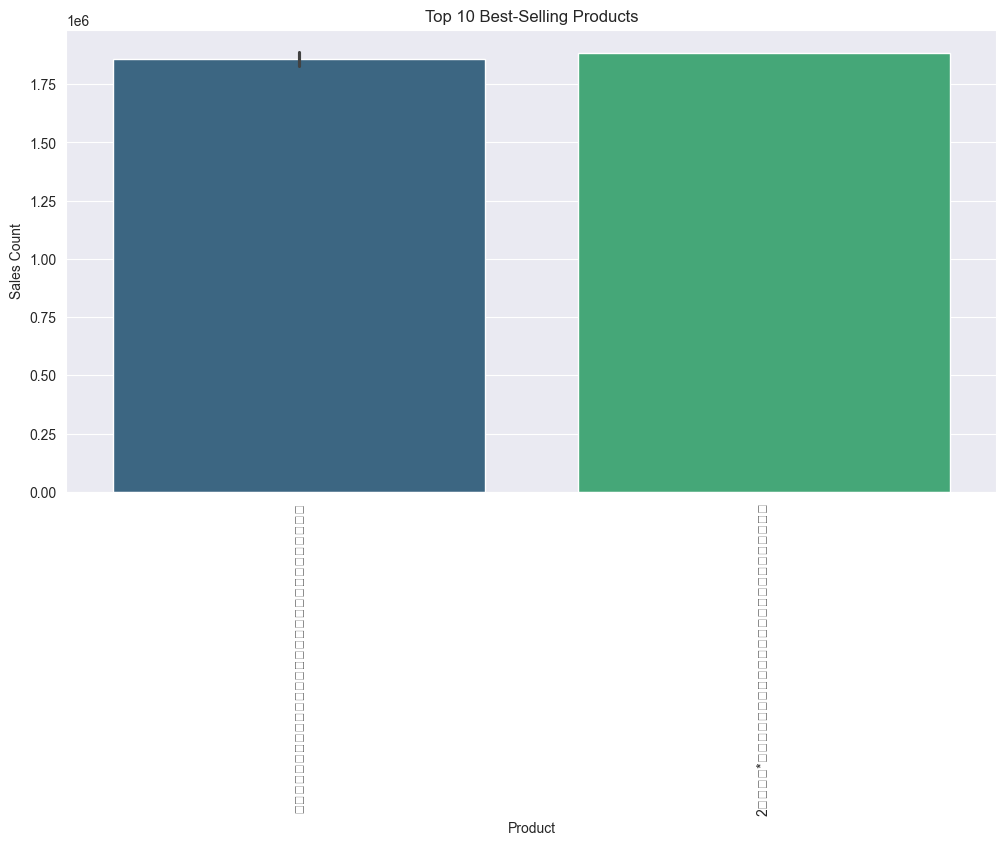

In [15]:
# 统计销量前十的商品
top_sales = data.sort_values(by='sale_count', ascending=False).head(10)

# 可视化：销量前十的商品
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales['title'], y=top_sales['sale_count'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Sales Count')
plt.show()

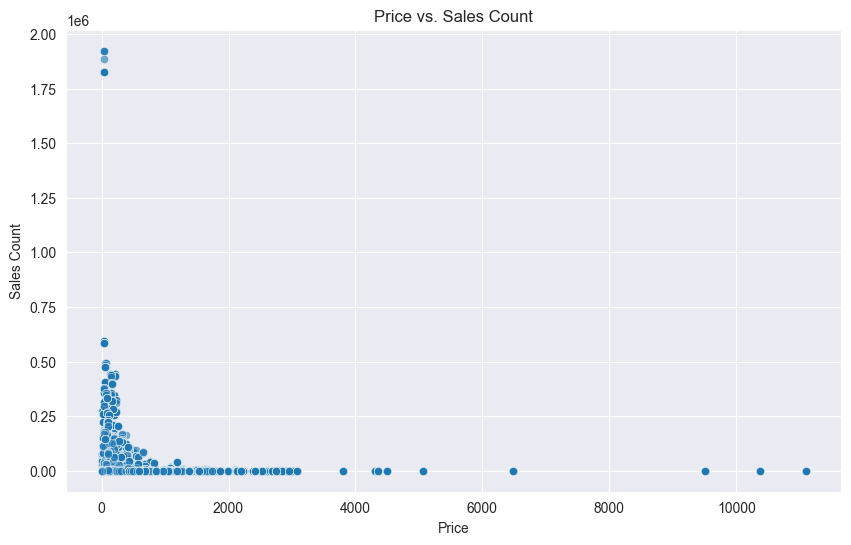

In [16]:
# 价格 vs. 销量分析
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price'], y=data['sale_count'], alpha=0.6)
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.title('Price vs. Sales Count')
plt.show()

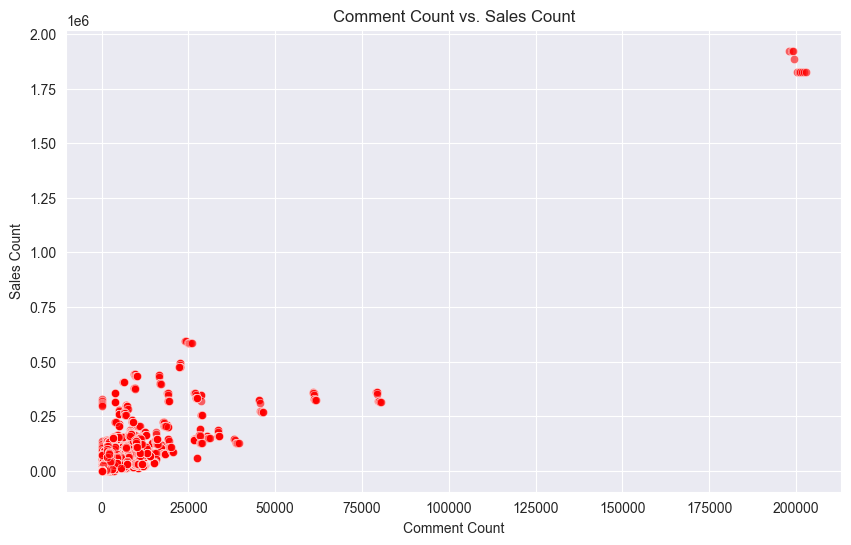

In [17]:
# 评论数 vs. 销量分析
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['comment_count'], y=data['sale_count'], alpha=0.6, color='r')
plt.xlabel('Comment Count')
plt.ylabel('Sales Count')
plt.title('Comment Count vs. Sales Count')
plt.show()

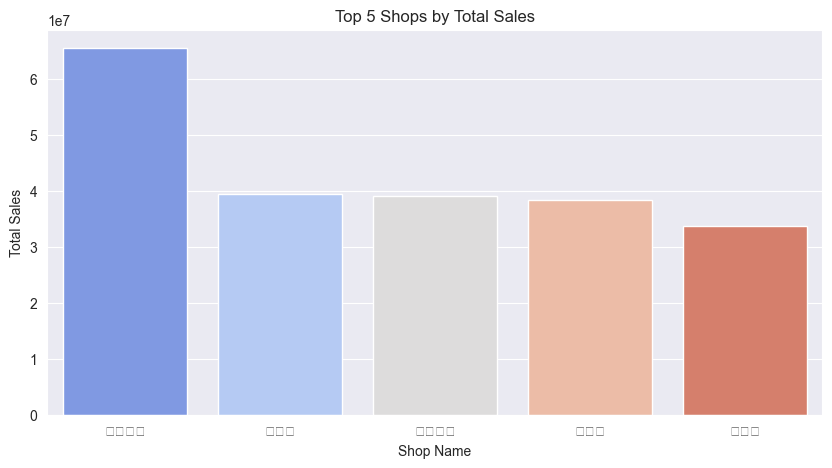

In [18]:
# 按店铺统计销量
top_shops = data.groupby('店名')['sale_count'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_shops.index, y=top_shops.values, palette='coolwarm')
plt.title('Top 5 Shops by Total Sales')
plt.xlabel('Shop Name')
plt.ylabel('Total Sales')
plt.show()